# Tarea 2

En primer lugar cargaremos los datos y las librerías.

In [2]:
# librerias utilizadas

## Numpy y pandas
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Modulos útiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Regresion Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

# Regresion LASSO
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

# Regresion Elastic-Net
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

# LASSO Adaptativo
!pip install asgl
import asgl

# Regresión Lineal
from sklearn.linear_model import LinearRegression

Cargaremos los datos desde un archivo llamado `Hitters.csv`, éste corresponde al conjunto de datos `Hitters` de la librería `ISLR` transformados a un archivo `.csv`.

Los datos contienene las siguientes variables:

* `AtBat`: Número de veces que tomó el turno para batear en 1986.
* `Hits`: Número de *hits* en 1986.
* `HmRuns`: Número de *home runs* en 1986.
* `Runs`: Número de carreras en 1986.
* `RBI`: Número de carreras bateadas (carreras bateadas impulsadas) en 1986.
* `Walks`: Número de bases por bolas (*walks*) en 1986.
* `Years`: Número de años en las ligas mayores.
* `CAtBat`: Número de veces que tomó el turno para batear durante su carrera.
* `CHits`: Número de *hits* durante su carrera.
* `CHmRuns`: Número de *home runs* durante su carrera.
* `CRuns`: Número de carreras durante su carrera.
* `CRBI`: Número de carreras bateadas (carreras bateadas impulsadas) durante su carrera.
* `CWalks`: Número de bases por bolas ("*walks*) durante su carrera.
* `League`: Un factor con niveles A (American) y N (National) que indican la liga del jugador a finales de 1986.
* `Division`: Un factor con niveles E (East) y W (West) que indican la división del jugador a finales de 1986.
* `PutOuts`: Número de *put outs* en 1986.  
* `Assists`: Número de asistencias en 1986.  
* `Errores`: Número de errores en 1986.
* `Salary`: Salario anual de 1987 en el día de apertura, en miles de dólares.
* `NewLeague`: Un factor con niveles A y N que indican la liga del jugador a principios de 1987.


In [4]:
# cargamo los datos
hitters = pd.read_csv("Hitters.csv")

# cambiamos el nombre de la primera columna a "jugador"
hitters = hitters.rename(columns = {"Unnamed: 0" : "jugador"})

# imprimimos los resultados
hitters

,jugador,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


## Estudio de valores faltantes

Es posible observar que existen valores faltantes en la variable respuesta, es decir, `Salary`, por lo que analizaremos la cantidad de valores faltantes por columna del conjunto de datos.

In [ ]:
hitters.isna().sum()

jugador       0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Observamos que existen 59 valores faltantes, estos corresponde al 18,32% del total de datos. Además, estudiaremos los posibles valores de las variables, pues puede que existan registros que sean nulos, pero no están en formato `NaN`.

In [ ]:
hitters.nunique()

jugador      322
AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [ ]:
hitters[hitters["Salary"].isna()].describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,0.0
mean,279.677966,70.694915,6.983051,33.813559,32.610169,28.169492,8.033898,2609.186441,697.000000,70.610169,347.983051,328.779661,260.118644,281.033898,54.101695,5.576271,NaN
std,139.477898,39.994075,7.449813,20.921425,21.616578,17.935856,5.483411,2505.342123,687.099501,103.269820,349.489948,377.051724,282.404826,286.401753,71.432315,4.441976,NaN
min,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,28.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,197.500000,45.500000,1.500000,20.000000,18.500000,16.000000,4.000000,704.500000,171.000000,9.500000,71.500000,61.000000,54.000000,103.000000,4.000000,2.000000,NaN
50%,249.000000,61.000000,5.000000,30.000000,29.000000,25.000000,7.000000,1407.000000,361.000000,28.000000,167.000000,185.000000,150.000000,205.000000,23.000000,5.000000,NaN
75%,352.500000,94.000000,9.000000,44.500000,42.500000,37.500000,12.000000,4333.500000,1060.000000,66.500000,608.000000,447.000000,426.500000,342.500000,84.000000,8.000000,NaN
max,580.000000,194.000000,35.000000,91.000000,94.000000,87.000000,23.000000,9778.000000,2732.000000,442.000000,1272.000000,1652.000000,1153.000000,1378.000000,327.000000,20.000000,NaN


In [ ]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Para estudiar los valores los valores faltantes se realiza un procedimiento similar a ggparis de R.

In [ ]:
# creamos una copia de los datos
hitters_2 = hitters.copy(deep = True)

# Añadimos una columna que especidique el valor es nulo o no
hitters_2['valor_nulo'] = hitters_2['Salary'].apply(lambda x: 'SÍ' if pd.isnull(x) else 'NO')

# Segmentamos los primeros 7 datos (los relacionados con el rendimiento de las temporadas)
# más la columna que indica si tiene un valor nulo o no

hitters_21 = hitters_2[list(hitters_2.columns[1:7]) + [hitters_2.columns[21]]]
hitters_21

,AtBat,Hits,HmRun,Runs,RBI,Walks,valor_nulo
0,293,66,1,30,29,14,SÍ
1,315,81,7,24,38,39,NO
2,479,130,18,66,72,76,NO
3,496,141,20,65,78,37,NO
4,321,87,10,39,42,30,NO
...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,NO
318,492,136,5,76,50,94,NO
319,475,126,3,61,43,52,NO
320,573,144,9,85,60,78,NO


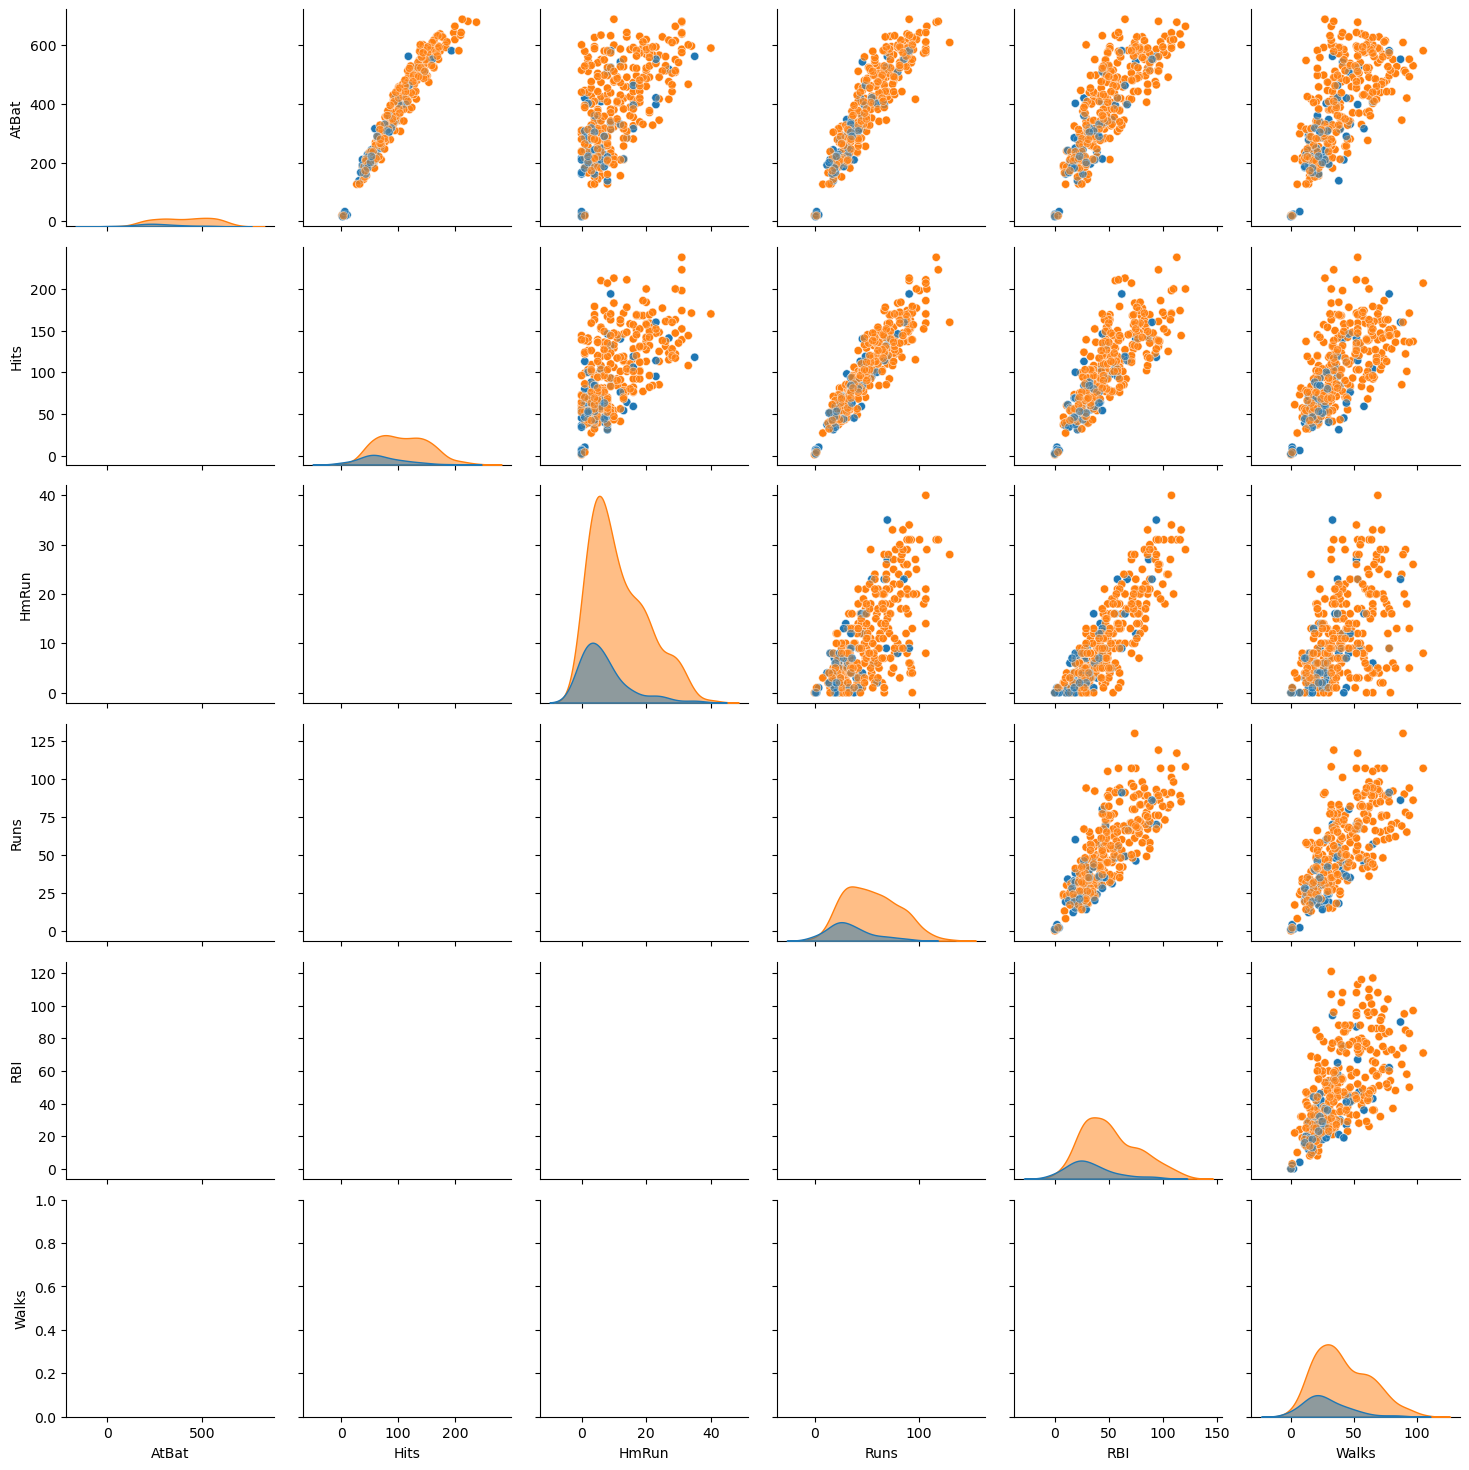

In [ ]:
g = sns.PairGrid(hitters_21, hue="valor_nulo")
g.map_upper(sns.scatterplot)                       # Gráficos de dispersión en la parte superior de la matriz
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)      # Histogramas en la diagonal

# Personalizar los gráficos si es necesario
g.map_upper(sns.scatterplot, alpha=0.5)  # Añadir transparencia a los gráficos de dispersión

# Mostrar la matriz de gráficos
plt.show()

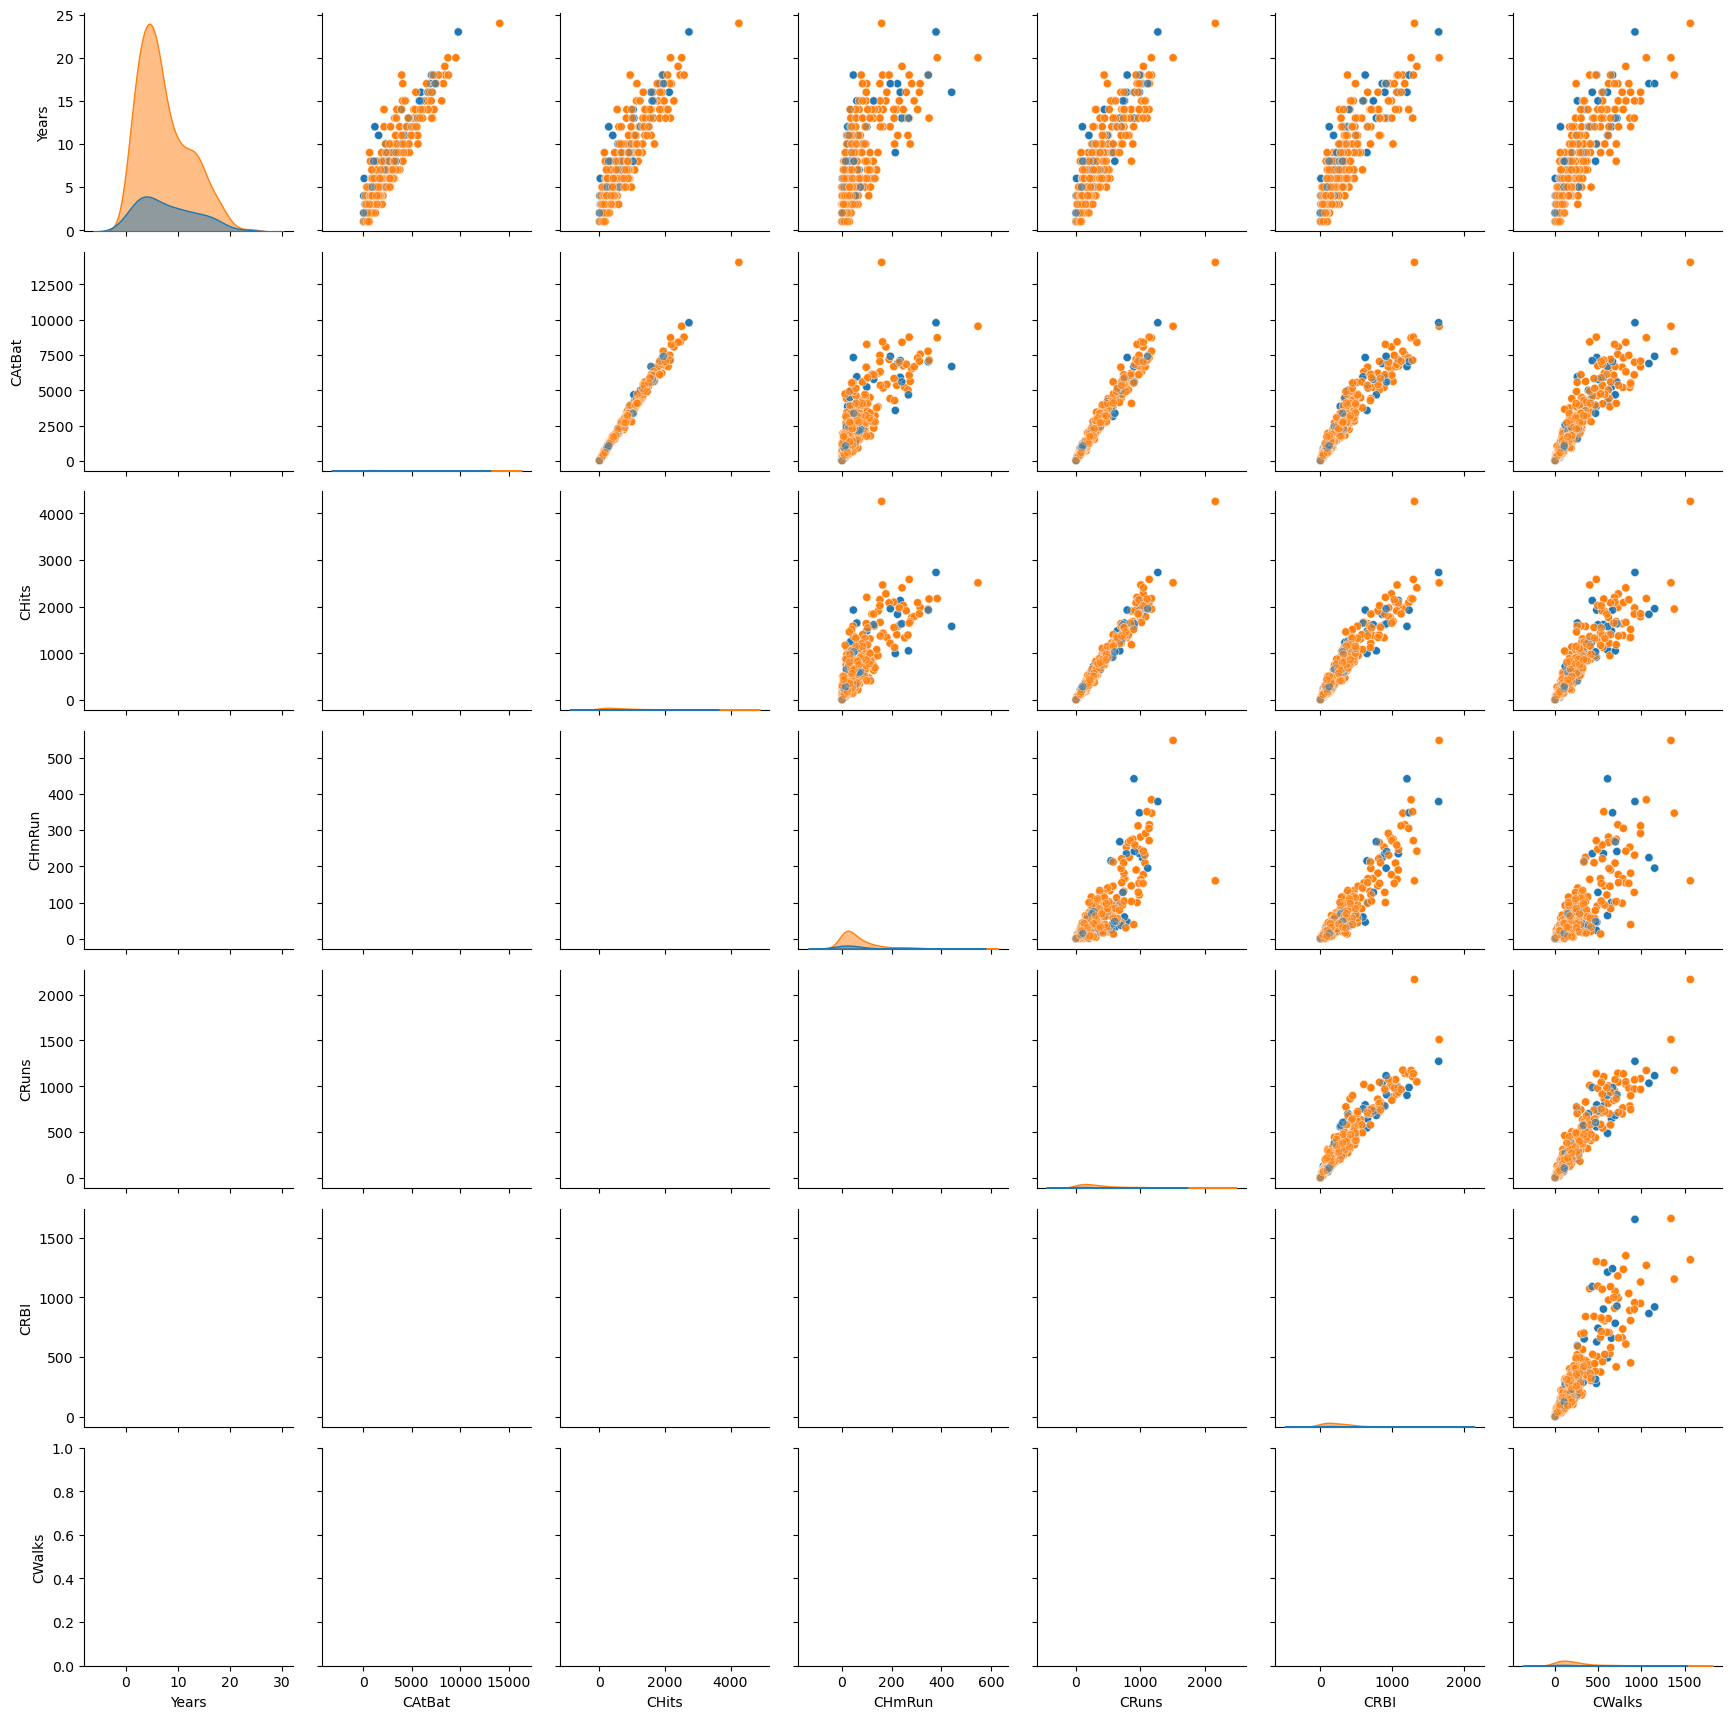

In [ ]:
hitters_22 = hitters_2[list(hitters_2.columns[7:14]) + [hitters_2.columns[21]]]

g2 = sns.PairGrid(hitters_22, hue = "valor_nulo")
g2.map_upper(sns.scatterplot)                       # Gráficos de dispersión en la parte superior de la matriz
g2.map_diag(sns.kdeplot, fill = True, alpha = 0.5)      # Histogramas en la diagonal

# Personalizar los gráficos si es necesario
g2.map_upper(sns.scatterplot, alpha = 0.5)  # Añadir transparencia a los gráficos de dispersión

# Mostrar la matriz de gráficos
plt.show()

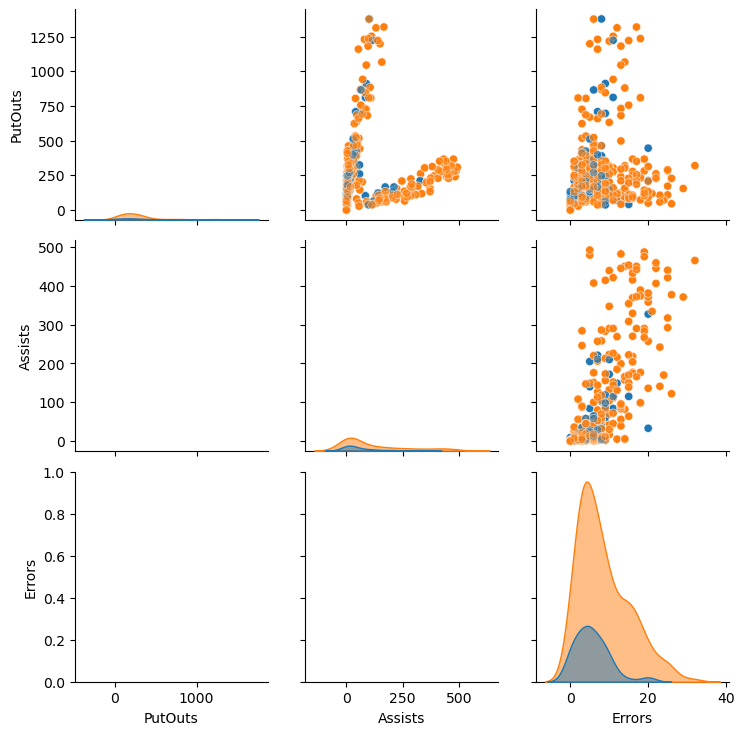

In [ ]:
hitters_23 = hitters_2[list(hitters_2.columns[16:19]) + [hitters_2.columns[21]]]

hitters_23
g3 = sns.PairGrid(hitters_23, hue = "valor_nulo")
g3.map_upper(sns.scatterplot)                       # Gráficos de dispersión en la parte superior de la matriz
g3.map_diag(sns.kdeplot, fill = True, alpha = 0.5)      # Histogramas en la diagonal

# Personalizar los gráficos si es necesario
g3.map_upper(sns.scatterplot, alpha = 0.5)  # Añadir transparencia a los gráficos de dispersión

# Mostrar la matriz de gráficos
plt.show()

## Imputación de datos

En esta sección se probaron dos métodos, pero como se menciona en el informe no se implementaron, los datos faltantes se omitieron.

### Imputación por la media

Uno de los métodos más sencillos para imputar datos es remplazar los valores faltantes por el promedio de los registros obsevados. Si bien, este método no es muy recomendable implementarlo, pues reduce la varianza de los datos, además de considerar el promedio puede ser demasiado arriesgado al no considerar información adicional, se utilizará debido a que es fácil implementarlo y permite comparar con otros métodos de imputación.

In [ ]:
salary_obs = hitters['Salary'].dropna()

hitters_mean = hitters.copy(deep = True)
hitters_mean['Salary'] = hitters_mean['Salary'].fillna(round(salary_obs.mean(), 1))
hitters_mean

,jugador,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,535.9,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


### Imputación por la mediana

De manera similar a lo mostrado anteriormente, imputaremos los datos faltantes con la mediana, pues este estadístico, a diferencia de la media, es robusto a valores extremos. Lo anterior permitirá estudiar el efecto de diferentes métodos, también conlleva los mismos problemas que al imputar por la media.

In [ ]:
hitters_median = hitters.copy(deep = True)
hitters_median['Salary'] = hitters_median['Salary'].fillna(round(salary_obs.median(), 1))
hitters_median

,jugador,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,425.0,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


## Correlaciones

Comom análisis exploratorio, estudiaremos las correlaciones entre los predictores, pues en caso de existir relación entre los predictores, podría afectar la varianza de las estimaciones de los parámetros.

In [ ]:
# Codigo extraido de ayudantia
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index() # stack transforma la matriz en una tabla | resent index: literal : resetea indice
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :] # limina las que son 1
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

hitters2 = hitters.copy(deep=True)

hitters2["LogSalary"] = np.log(hitters2["Salary"])

# backslash salto de linea
corr_matrix = hitters2.select_dtypes(include=['float64', 'int']).corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(100))

,variable_1,variable_2,r,abs_r
134,CAtBat,CHits,0.995063,0.995063
151,CHits,CAtBat,0.995063,0.995063
154,CHits,CRuns,0.984609,0.984609
188,CRuns,CHits,0.984609,0.984609
136,CAtBat,CRuns,0.983345,0.983345
...,...,...,...,...
297,Salary,CHmRun,0.524931,0.524931
179,CHmRun,LogSalary,0.523943,0.523943
315,LogSalary,CHmRun,0.523943,0.523943
164,CHmRun,HmRun,0.493227,0.493227


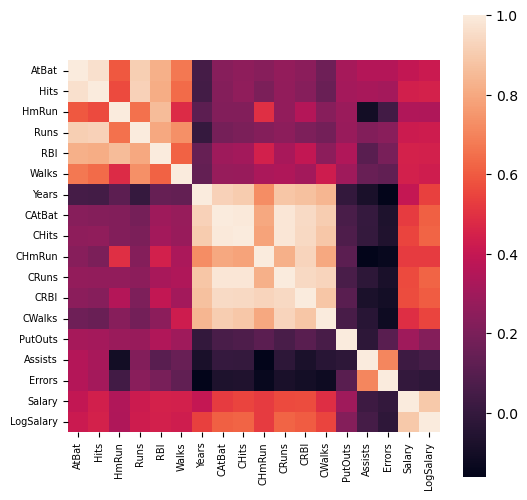

In [ ]:
# Codigo adaptado de ayudantía
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 7)

Es posible observar que existen grupos de variables que están correlacionadas entre sí. En particular, las primeras 6 variables están relacionadas con el rendimiento en la temporada 86-87, mietras que las 7 siguientes están relacionadas con el rendimiento en la carrera. Mientras que el resto, no muestra mayores correlaciones (solamente entre errores y asistencias de la temporadas 86-87).

## Problema a)

En esta sección estudiaremos diferentes métodos de selección de variables, para ello utilizaremos todos los datos y visualizaremos los resultados.

Para implementar los procedimientos debemos escalar los datos ya que en el libro *Introduction to Statistical Learning with Applications in R* mencionan que algunos métodos son sensibles a cambios de escala. Además, se debe transformar las columnas categóricas a variables dummies, pues las funciones no permiten objetos no numéricos.

In [5]:
def funcion_diseno(df):
    # eliminamos las columnas de jugador y Salario
    X = df.dropna().drop(columns=['jugador', 'Salary'])

    M = X.select_dtypes(include=['number'])

    columnas = M.columns

    # Estandarizamos las variables numericas
    scale = StandardScaler()
    M = scale.fit_transform(M)

    M = pd.DataFrame(M, columns= columnas)

    # transformamos la caolumna League a dummy y la eliminamos
    M = pd.concat([M.reset_index(), pd.get_dummies(X['League']).reset_index()], axis = 1).drop(columns=['A'])
    # cambiamos el nombre de las columnas generadas
    M =  M.rename(columns = {"N": "League_N"})

    # transformamos la caolumna Division a dummy y la eliminamos
    M = pd.concat([M, pd.get_dummies(X['Division']).reset_index()], axis = 1).drop(columns=['E'])
    # cambiamos el nombre de las columnas generadas
    M = M.rename(columns = {"W": "Division_W"})

    # transformamos la caolumna Division a dummy y la eliminamos
    M = pd.concat([M, pd.get_dummies(X['NewLeague']).reset_index()], axis = 1).drop(columns=['A'])
    # cambiamos el nombre de las columnas generadas
    M = M.rename(columns = {"N": "NLeague_N"})

    M = M.drop(columns="index")



    # retornamos los resultados
    return(M)

X = funcion_diseno(hitters)


y = np.log(hitters['Salary'].dropna())


En esta secció se graficarán los coeficientes y se estudiará el comportamiento con respecto a los valores de alpha

### Regresión Ridge


In [4]:
# Ajustamos el modelo Ridge
modelo_ridge = RidgeCV(
    alphas  = np.logspace(-4, 6, 1000), #grilla de valores
    cv      = 10, # creamos 10 "cajitas"
    scoring ='neg_mean_squared_error' # utilizamos el error cuadratico medio para evaluar
)

# genere el modelo, pero no lo guarda
_ = modelo_ridge.fit(X = X, y = y)

In [ ]:
print(modelo_ridge.alpha_)

10.115911122238298


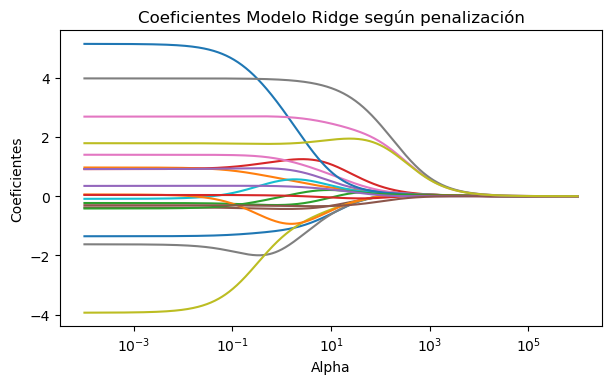

In [ ]:
alphas = modelo_ridge.alphas  # guarda los alphas
coefs = [] # lista vacia de los coeficiencientes

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False) # no genere el intercepto, pues es el promedio (no se tiene que penalizar)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Ridge según penalización');
plt.axis('tight') # tanto al eje x como y se ajusten a lo que esta pidiendo
plt.show()

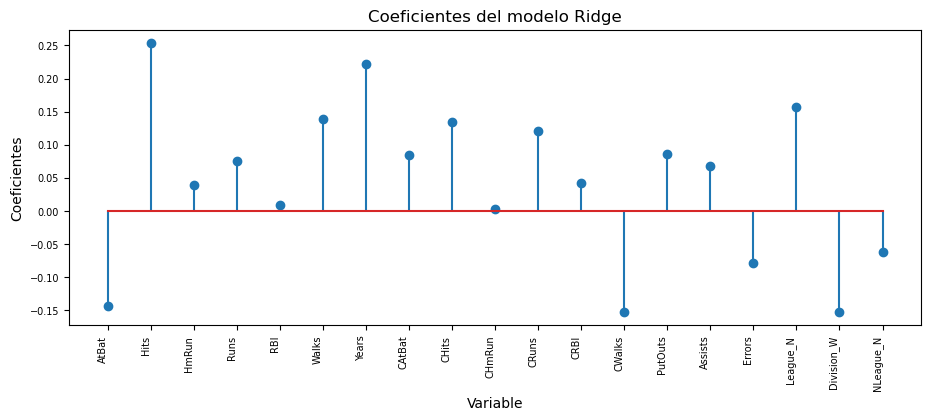

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_ridge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge')
ax.tick_params(labelsize = 7)

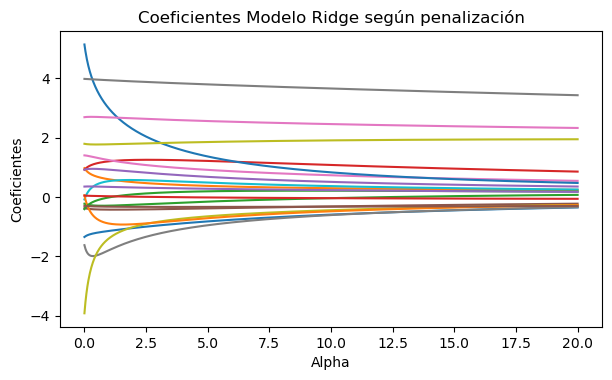

In [ ]:
# Ridge regression
alphas = np.linspace(0.001, 20, 1000)  # guarda los alphas
coefs = []

ridge = Ridge()

for a in alphas:
    ridge.set_params(alpha=a, fit_intercept = False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Ridge según penalización');
plt.axis('tight') # tanto al eje x como y se ajusten a lo que esta pidiendo
plt.show()


### Regresión LASSO

In [ ]:
modelo_lasso = LassoCV(
            alphas          = np.logspace(-4, 3, 3000),
            cv              = 10, # en la validacion cruzada hace 10 "cajitas"
            max_iter        = 2000
         )
_ = modelo_lasso.fit(X = X, y = y)

In [ ]:
modelo_lasso.alpha_

0.0026534318388055675

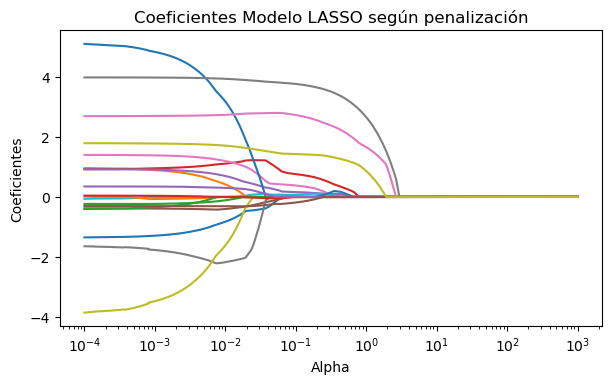

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo_lasso.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, max_iter = 3000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO según penalización')

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_lasso.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,AtBat,-0.305180
1,Hits,0.449623
2,HmRun,0.063495
5,Walks,0.188981
6,Years,0.277665
7,CAtBat,0.028713
8,CHits,0.051305
9,CHmRun,0.014185
10,CRuns,0.324827
12,CWalks,-0.251543


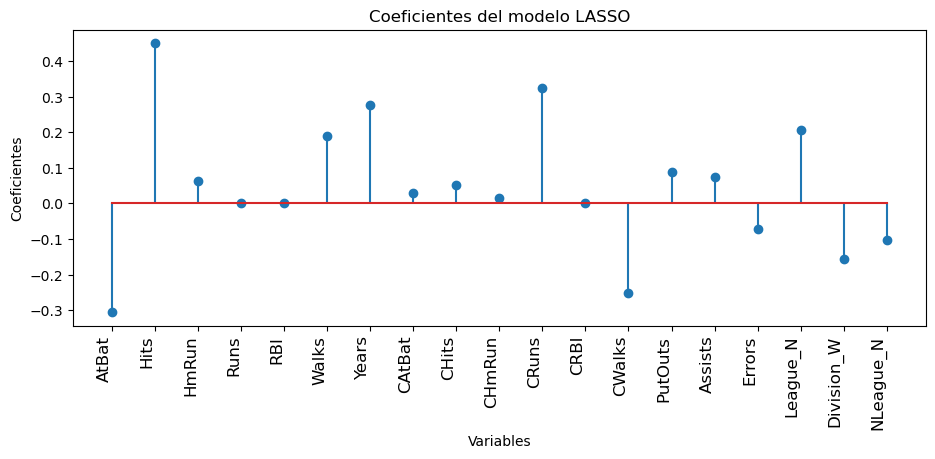

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo LASSO');

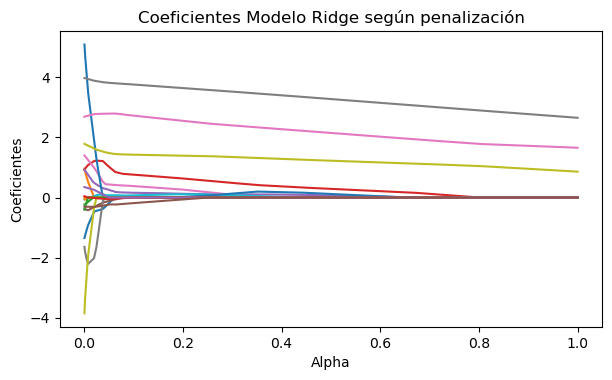

In [ ]:
alphas = np.linspace(0.0001, 1, 5000)
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, max_iter = 3000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO según penalización');
plt.axis('tight') # tanto al eje x como y se ajusten a lo que esta pidiendo
plt.show()

### Regresión Elastic-Net

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo_elasticnet = ElasticNetCV(
                       l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                       alphas   = np.logspace(-10, 3, 200),
                       cv       = 10,
                       max_iter = 2000
         )
_ = modelo_elasticnet.fit(X = X, y = y)

In [ ]:
print(modelo_elasticnet.alpha_)
print(modelo_elasticnet.l1_ratio_)

0.019791668678535573
0.1


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_elasticnet.coef_.flatten()}
                  )

Text(0.5, 1.0, 'Coeficientes del modelo ElasticNet')

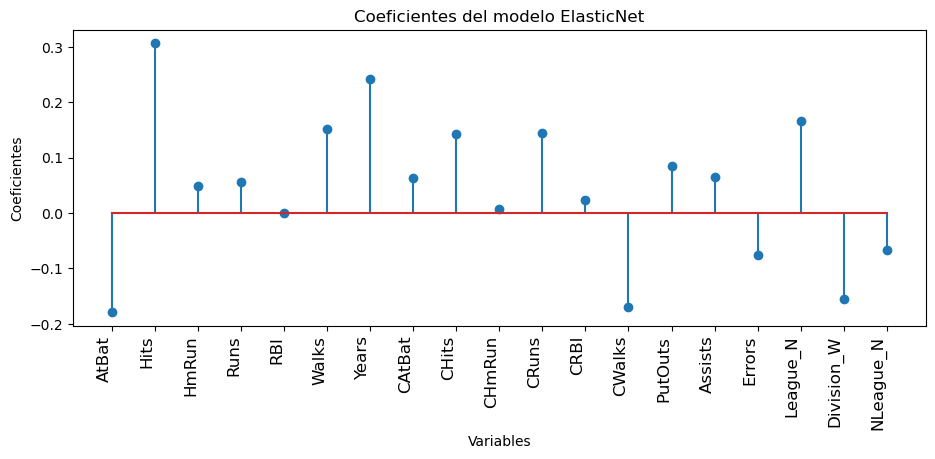

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo ElasticNet')

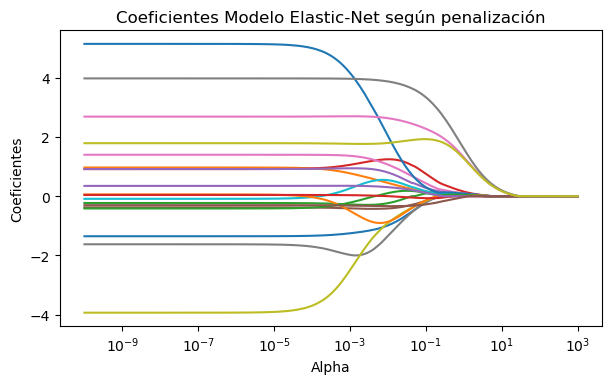

In [ ]:
# l1 ratio = 0.1
alphas = modelo_elasticnet.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.1, fit_intercept=False, max_iter = 10000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Elastic-Net según penalización');

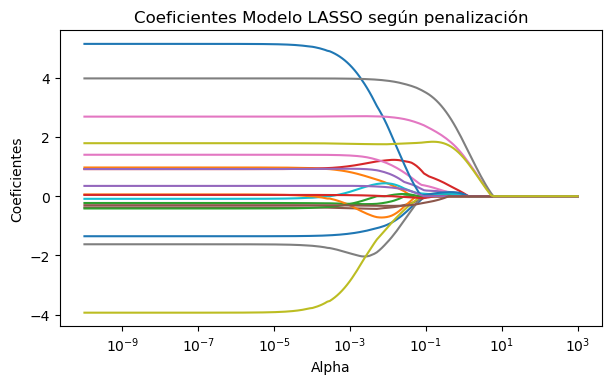

In [ ]:
# l1 ratio = 0.5
alphas = modelo_elasticnet.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.5, fit_intercept=False, max_iter = 9000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO según penalización');

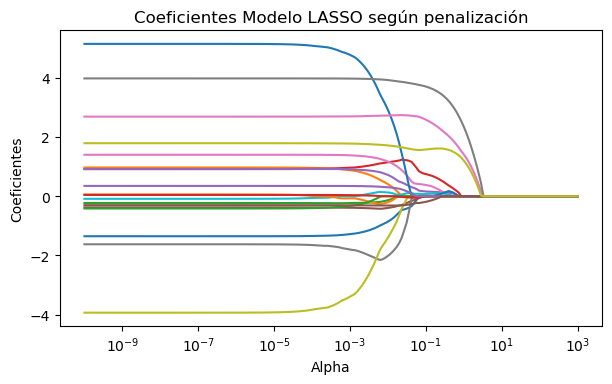

In [ ]:
# l1 ratio = 0.9
alphas = modelo_elasticnet.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.9, fit_intercept=False, max_iter = 9000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO según penalización');

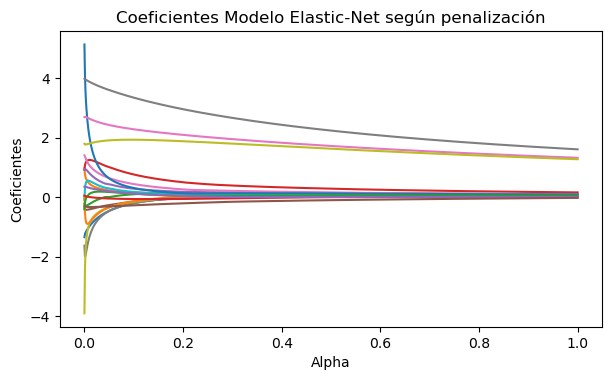

In [ ]:
# l1 ratio = 0.1
alphas = np.linspace(0.00001, 1, 1000)
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.1, fit_intercept=False, max_iter = 10000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Elastic-N!et según penalización');

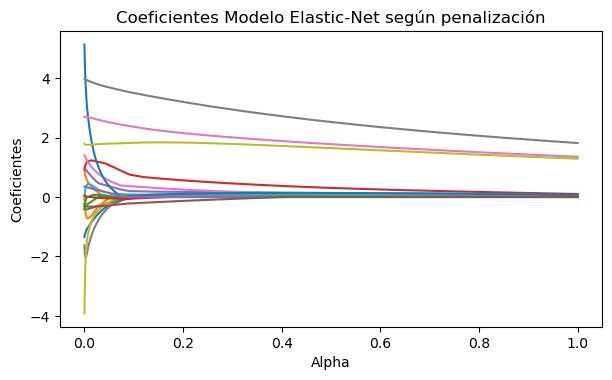

In [ ]:
# l1 ratio = 0.5
alphas = np.linspace(0.00001, 1, 1000)
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.5, fit_intercept=False, max_iter = 10000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Elastic-Net según penalización');

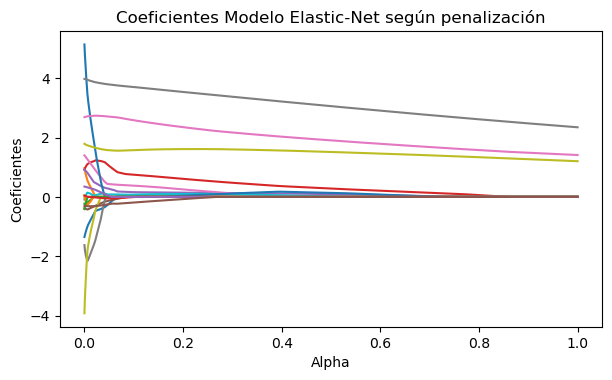

In [ ]:
# l1 ratio = 0.9
alphas = np.linspace(0.00001, 1, 1000)
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, l1_ratio = 0.9, fit_intercept=False, max_iter = 10000)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
#ax.set_ylim([-15,None])
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo Elastic-Net según penalización');

### LASSO Adaptativo

In [6]:
# Primero se obtienen los EMCO
modelo_mc = LinearRegression()
modelo_mc.fit(X = X, y = y)

df_coeficientes_mc = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_mc.coef_.flatten()}
                  )

lasso_weights = 1/np.abs(df_coeficientes_mc["coef"].values)

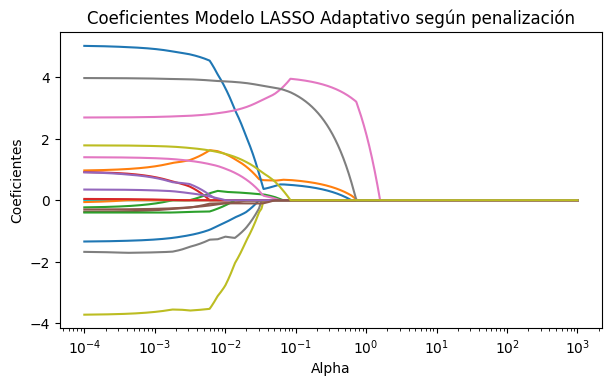

In [7]:
# Evolución de los coeficientes en función de lambda
# ==============================================================================
lambdas = np.logspace(-4, 3, 2000)
coefs = []

for l in lambdas:
    modelo_temp = asgl.ASGL(model = "lm", penalization="alasso", lambda1 = l,
                            lasso_weights=lasso_weights, parallel = True,
                            intercept = False, max_iters = 3000)
    modelo_temp.fit(X.values, y.values)
    coefs.append(modelo_temp.coef_[0])


fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO Adaptativo según penalización');

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarn

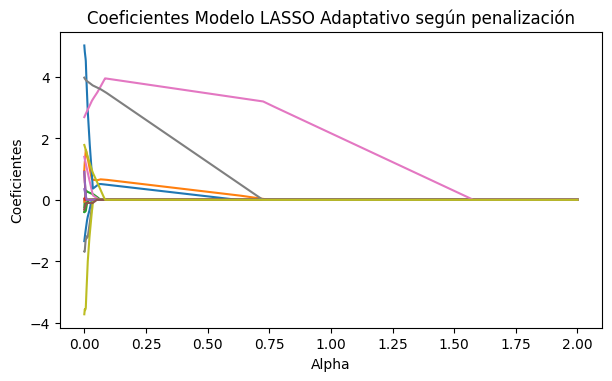

In [8]:
lambdas2 = np.linspace(0.0001, 2, 2000)
coefs = []

for l in lambdas2:
    modelo_temp = asgl.ASGL(model = "lm", penalization="alasso", lambda1 = l,
                            lasso_weights=lasso_weights, parallel = True,
                            intercept = False, max_iters = 3000)
    modelo_temp.fit(X.values, y.values)
    coefs.append(modelo_temp.coef_[0])

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(lambdas2, coefs)
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes Modelo LASSO Adaptativo según penalización');
plt.axis('tight') # tanto al eje x como y se ajusten a lo que esta pidiendo
plt.show()

Determinamos el alpha óptimo mediante validación cruzada

In [9]:
lambdas = np.logspace(-4, 3, 2000)
modelo_cv_lasso = asgl.CV(model='lm', penalization='alasso', intercept = True, lambda1=lambdas,
                          parallel=True, lasso_weights=lasso_weights, error_type='MSE',
                          random_state=3407, max_iters = 20000, nfolds = 10)

error = modelo_cv_lasso.cross_validation(x = X.values, y = y.values)
mean_error = np.mean(error, axis = 1)
error_minimo = np.argmin(mean_error)
optimal_parameters = modelo_cv_lasso.retrieve_parameters_value(error_minimo)
optimal_lambda = optimal_parameters.get("lambda1")
optimal_lambda

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarn

0.0003298064383876184

In [10]:
optimal_lambda

0.0003298064383876184

In [11]:
# Modelamos
modelo_alasso = asgl.ASGL(model = "lm", penalization="alasso", lambda1 = optimal_lambda,
                          lasso_weights=lasso_weights, intercept = True,
                          max_iters = 1000)
modelo_alasso.fit(X.values, y.values)


In [12]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_alasso.coef_[0][1:]}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,AtBat,-0.396600
1,Hits,0.510731
2,HmRun,0.075926
5,Walks,0.217437
6,Years,0.280409
7,CAtBat,0.082169
10,CRuns,0.397109
12,CWalks,-0.324561
13,PutOuts,0.090076
14,Assists,0.083156


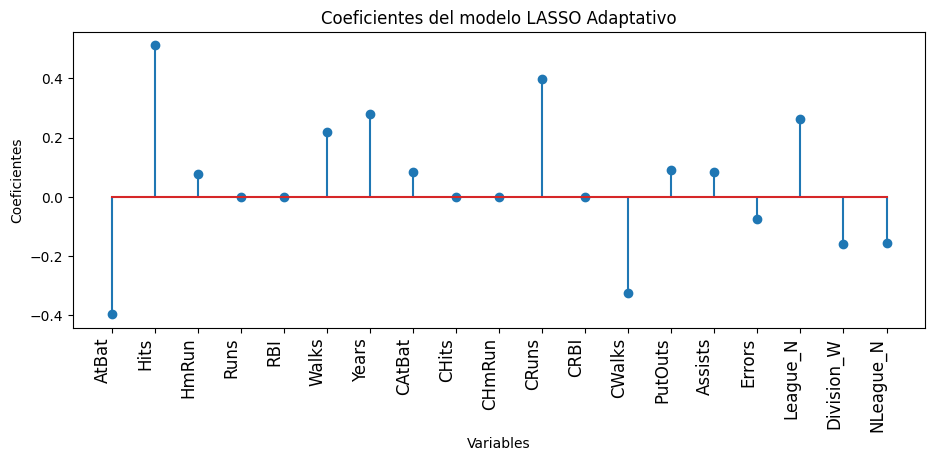

In [13]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo LASSO Adaptativo');

## Problema b)

### Modelo Lineal Simple

En esta secció se implmentará la metodología propuesta, además s escogerá el "mejor parámetro" y se mostrarán los resultados.

In [ ]:
np.random.seed(1234)

def error_lm(X, y):

    error_test = []
    error_val = []

    for i in range(10):
        # Seleccionamos los conjuntos de entrenamiento y test
        # En este método no hay parametros que calibrar
        X_train, X_aux, y_train, y_aux = train_test_split(X,
                                                        y.values.reshape(-1,1),
                                                        train_size   = 0.6,
                                                        shuffle      = True
        )

        # separamos aux en test y validacion
        X_val, X_test, y_val, y_test = train_test_split(X_aux,
                                                        y_aux.reshape(-1,1),
                                                        train_size   = 0.5,
                                                        #random_state = seed[i],
                                                        shuffle      = True
        )

        # Ajustamos el modelo
        modelo_lineal = LinearRegression()
        modelo_lineal.fit(X = X_train, y = y_train)

        # Realizamos las predicciones para el conjunto de testeo
        pred_test = modelo_lineal.predict(X = X_test)
        pred_test = pred_test.flatten()

        # calculamos el error cuadratico medio para el conjunto de testeo
        rmse_test = mean_squared_error(
                y_true  = y_test,
                y_pred  = pred_test,
                squared = True
               )

        # Realizamos las predicciones para el conjunto de testeo
        pred_val = modelo_lineal.predict(X = X_val)
        pred_val = pred_val.flatten()

        # calculamos el error cuadratico medio para el conjunto de testeo
        rmse_val = mean_squared_error(
                y_true  = y_val,
                y_pred  = pred_val,
                squared = True
               )

        error_test.append(rmse_test)
        error_val.append(rmse_val)

    return error_test, error_val

lineal_test, lineal_val = error_lm(X, y)

In [ ]:
print(round(np.mean(lineal_test), 3))
print(np.mean(lineal_test))

0.452
0.45212745629577517 3


Text(0.5, 1.0, 'Coeficientes del modelo ElasticNet')

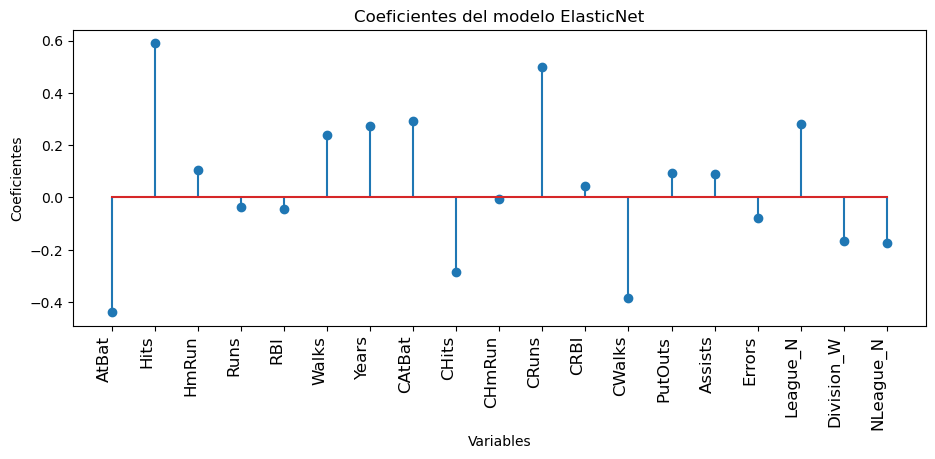

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X, y = y)

df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Mínimos Cuadrados')

### Ridge

In [ ]:
np.random.seed(3316)

def error_ridge(X, y, alphas = np.linspace(0.0001, 20, 1000)):

    # creamos una lista que guardará los 10 resultados
    lista_errores = []

    candidatos = []


    for i in range(10):
        # Seleccionamos los conjuntos de entrenamiento y aux
        # En este método no hay parametros que calibrar
        X_train, X_aux, y_train, y_aux = train_test_split(X,
                                                        y.values.reshape(-1,1),
                                                        train_size   = 0.6,
                                                        shuffle      = True
        )

        # separamos aux en test y validacion
        X_val, X_test, y_val, y_test = train_test_split(X_aux,
                                                        y_aux.reshape(-1,1),
                                                        train_size   = 0.5,
                                                        shuffle      = True
        )

        # creamos una lista que guarda los errores por alpha (sirve para calibrar)
        errores_alpha = []

        # ajustamos el modelo para cada parametro
        for alpha in alphas:
            modelo_temp = Ridge(alpha = alpha)
            modelo_temp.fit(X_train, y_train)

            # realizamos las predicciones
            predicciones = modelo_temp.predict(X = X_val)
            predicciones = predicciones.flatten()

            # calculamos el error cuadratico medio
            rmse_ridge = mean_squared_error(
                    y_true  = y_val,
                    y_pred  = predicciones,
                    squared = True
                   )

            # añadimos los resultados a una lista
            errores_alpha.append(rmse_ridge)

        # transformamos de una lista a un array
        errores_alpha = np.array(errores_alpha)

        # buscamos el valor de alpha tal que minimice
        valor_minimo = np.argmin(errores_alpha)

        candidatos.append(alphas[valor_minimo])

        # ajustamos el modelo final
        modelo_final = Ridge(alpha = alphas[valor_minimo])
        modelo_final.fit(X_train, y_train)

        # realizamos las predicciones
        pred = modelo_final.predict(X = X_test)
        pred = pred.flatten()

        # calculamos el error cuadratico medio a
        rmse_final = mean_squared_error(
                y_true  = y_test,
                y_pred  = pred,
                squared = True
               )

    print(len(candidatos))

    modelo_ridge = RidgeCV(alphas  = candidatos, #grilla de valores
                            cv      = 10, # creamos 10 "cajitas"
                            scoring ='neg_mean_squared_error' # utilizamos el error cuadratico medio para evaluar
                            )
    modelo_ridge.fit(X = X, y = y)

    best_alpha = modelo_ridge.alpha_

    lista_errores.append(rmse_final)

    return lista_errores, best_alpha

ridge_error, best_ridge = error_ridge(X, y)

10


In [ ]:
print(np.mean(ridge_error))
print(round(np.mean(ridge_error), 3))
print(best_ridge)

0.4703962898712377
0.47
13.233267067067066


Text(0.5, 1.0, 'Coeficientes del modelo Ridge')

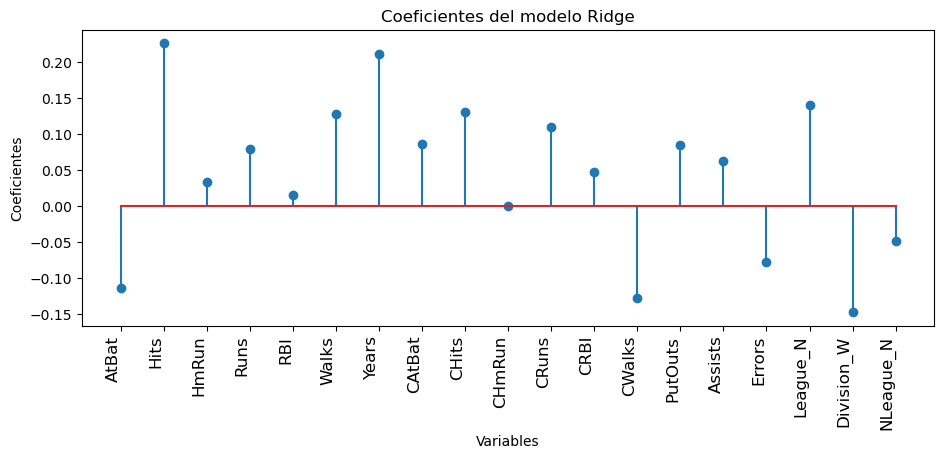

In [ ]:
modelo = Ridge(alpha = best_ridge)
modelo.fit(X = X, y = y)

df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge')

### Regresión Lasso

In [ ]:
np.random.seed(3316)

def error_lasso(X, y, alphas = np.linspace(0.002, 50, 500)):

    # creamos una lista que guardará los 10 resultados
    lista_errores = []

    # candidatos
    candidatos = []

    for i in range(10):
        # Seleccionamos los conjuntos de entrenamiento y aux
        # En este método no hay parametros que calibrar
        X_train, X_aux, y_train, y_aux = train_test_split(X,
                                                        y.values.reshape(-1,1),
                                                        train_size   = 0.6,
                                                        shuffle      = True
        )

        # separamos aux en test y validacion
        X_val, X_test, y_val, y_test = train_test_split(X_aux,
                                                        y_aux.reshape(-1,1),
                                                        train_size   = 0.5,
                                                        shuffle      = True
        )

        # creamos una lista que guarda los errores por alpha (sirve para calibrar)
        errores_alpha = []

        # ajustamos el modelo para cada parametro
        for alpha in alphas:
            modelo_temp = Lasso(alpha = alpha,
                                max_iter = 20000)
            modelo_temp.fit(X_train, y_train)

            # realizamos las predicciones
            predicciones = modelo_temp.predict(X = X_val)
            predicciones = predicciones.flatten()

            # calculamos el error cuadratico medio
            rmse_lasso = mean_squared_error(
                    y_true  = y_val,
                    y_pred  = predicciones,
                    squared = True
                   )

            # añadimos los resultados a una lista
            errores_alpha.append(rmse_lasso)

        # transformamos de una lista a un array
        errores_alpha = np.array(errores_alpha)

        # buscamos el valor de alpha tal que minimice
        valor_minimo = np.argmin(errores_alpha)

        candidatos.append(alphas[valor_minimo])

        # ajustamos el modelo final
        modelo_final = Lasso(alpha = alphas[valor_minimo])
        modelo_final.fit(X_train, y_train)

         # realizamos las predicciones
        pred = modelo_final.predict(X = X_test)
        pred = pred.flatten()

        # calculamos el error cuadratico medio a
        rmse_final = mean_squared_error(
                y_true  = y_test,
                y_pred  = pred,
                squared = True
               )

        lista_errores.append(rmse_final)

    len(candidatos)

    modelo_lasso = LassoCV(
            alphas          = candidatos,
            cv              = 10, # en la validacion cruzada hace 10 "cajitas"
            max_iter        = 2000
         )
    modelo_lasso.fit(X = X, y = y)

    best_alpha = modelo_lasso.alpha_

    return lista_errores, best_alpha

lasso_error, best_lasso = error_lasso(X, y)
print(lasso_error)

[0.315448648759451, 0.43039571607423166, 0.40150754945263173, 0.42618654521189236, 0.47844707454361607, 0.31443073323271514, 0.43102415928765164, 0.35763833145238044, 0.4016558733659374, 0.42011486268103126]


In [ ]:
print(np.mean(lasso_error))
print(round(np.mean(lasso_error), 3))
print(best_lasso)

0.39768494940615384
0.398
0.002


Text(0.5, 1.0, 'Coeficientes del modelo LASSO')

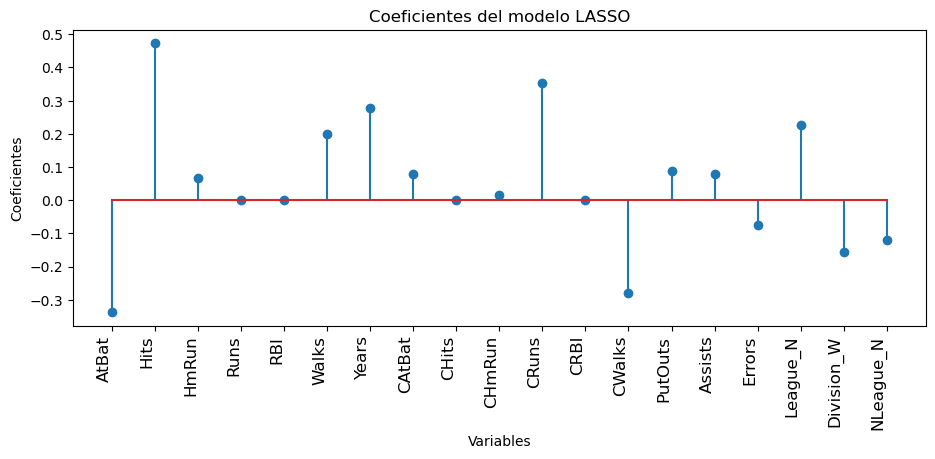

In [ ]:
modelo = Lasso(alpha = best_lasso)
modelo.fit(X = X, y = y)

df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo LASSO')

### Modelo Elastic-Net

In [ ]:
np.random.seed(1234)

def error_elasticnet(X, y, alphas = np.linspace(0.002, 50, 200)):

    # creamos una lista que guardará los 10 resultados
    lista_errores = []

    candidatos_alpha = []
    candidatos_peso = []

    for i in range(10):
        # Seleccionamos los conjuntos de entrenamiento y aux
        # En este método no hay parametros que calibrar
        X_train, X_aux, y_train, y_aux = train_test_split(X,
                                                        y.values.reshape(-1,1),
                                                        train_size   = 0.6,
                                                        shuffle      = True
        )

        # separamos aux en test y validacion
        X_val, X_test, y_val, y_test = train_test_split(X_aux,
                                                        y_aux.reshape(-1,1),
                                                        train_size   = 0.5,
                                                        shuffle      = True
        )

        # creamos una lista que guarda los errores por alpha (sirve para calibrar)
        errores_alpha = []
        lista_alphas = []
        lista_pesos = []

        pesos = np.linspace(0.1, 0.9, 20)

        for peso in pesos:
        # ajustamos el modelo para cada parametro
            for alpha in alphas:
                modelo_temp = ElasticNet(alpha = alpha,
                                         max_iter = 25000,
                                         l1_ratio = peso)
                modelo_temp.fit(X_train, y_train)

                # realizamos las predicciones
                predicciones = modelo_temp.predict(X = X_val)
                predicciones = predicciones.flatten()

                # calculamos el error cuadratico medio
                rmse_lasso = mean_squared_error(
                        y_true  = y_val,
                        y_pred  = predicciones,
                        squared = True
                       )

                # añadimos los resultados a una lista
                errores_alpha.append(rmse_lasso)
                lista_alphas.append(alpha)
                lista_pesos.append(peso)

        # transformamos de una lista a un array
        errores_alpha = np.array(errores_alpha)

        # buscamos el valor de alpha tal que minimice
        valor_minimo = np.argmin(errores_alpha)


        candidatos_alpha.append(lista_alphas[valor_minimo])
        candidatos_peso.append(lista_pesos[valor_minimo])

        # ajustamos el modelo final
        modelo_final = ElasticNet(alpha = lista_alphas[valor_minimo],
                                  l1_ratio = lista_pesos[valor_minimo])
        modelo_final.fit(X_train, y_train)

         # realizamos las predicciones
        pred = modelo_final.predict(X = X_test)
        pred = pred.flatten()

        # calculamos el error cuadratico medio a
        rmse_final = mean_squared_error(
                y_true  = y_test,
                y_pred  = pred,
                squared = True
               )

        lista_errores.append(rmse_final)

    modelo_elasticnet = ElasticNetCV(
                       l1_ratio = candidatos_peso,
                       alphas   = candidatos_alpha,
                       cv       = 10,
                       max_iter = 2000
    )

    modelo_elasticnet.fit(X = X, y = y)

    best_alpha = modelo_elasticnet.alpha_

    best_peso = modelo_elasticnet.l1_ratio_


    return lista_errores, best_alpha, best_peso

elasticnet_error, best_alpha, best_peso = error_elasticnet(X, y)

In [ ]:
print(np.mean(elasticnet_error))
print(round(np.mean(elasticnet_error), 3))

0.3808343435922147
0.381


Text(0.5, 1.0, 'Coeficientes del modelo ElasticNet')

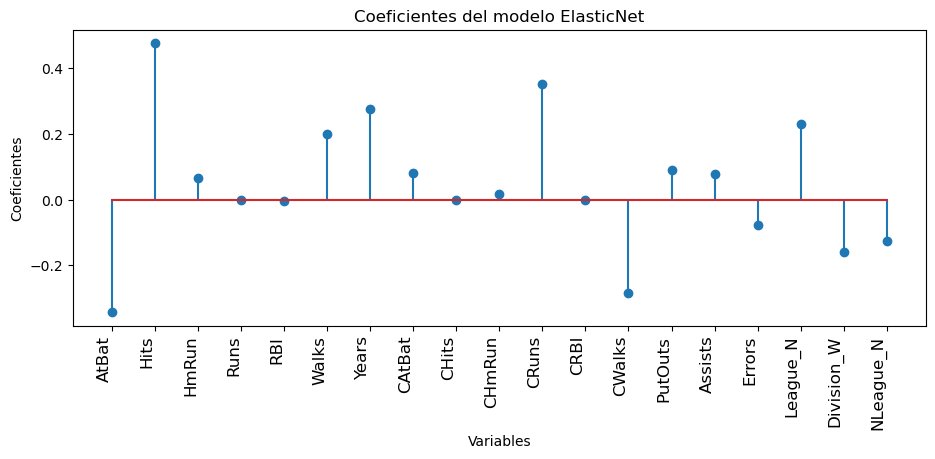

In [ ]:
modelo = ElasticNet(alpha = best_alpha, l1_ratio = best_peso)
modelo.fit(X = X, y = y)

df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt='o')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo ElasticNet')

### LASSO Adaptativo

In [14]:
np.random.seed(1234)

def error_alasso(X, y, alphas = np.linspace(0.002, 50, 100)):
  # creamos una lista que guardará los 10 resultados
  lista_errores = []

  for i in range(10):
      # Seleccionamos los conjuntos de entrenamiento y aux
      # En este método no hay parametros que calibrar
      X_train, X_aux, y_train, y_aux = train_test_split(X,
                                                      y.values.reshape(-1,1),
                                                      train_size   = 0.6,
                                                      shuffle      = True
      )
      # separamos aux en test y validacion
      X_val, X_test, y_val, y_test = train_test_split(X_aux,
                                                      y_aux.reshape(-1,1),
                                                      train_size   = 0.5,
                                                      shuffle      = True
      )
      modelo_mc = LinearRegression()
      modelo_mc.fit(X = X_train, y = y_train)
      df_coeficientes_mc = pd.DataFrame(
                      {'predictor': X_train.columns,
                       'coef': modelo_mc.coef_.flatten()})
      lasso_weights = 1/np.abs(df_coeficientes_mc["coef"].values)

      # creamos una lista que guarda los errores por alpha (sirve para calibrar)
      errores_alpha = []

      for alpha in alphas:
        modelo_temp = asgl.ASGL(model = "lm", penalization="alasso", lambda1 = alpha,
                          lasso_weights=lasso_weights, parallel = True,
                          max_iters = 1000)

        modelo_temp.fit(X_train.values, y_train.flatten())

        # realizamos las predicciones
        predicciones = modelo_temp.predict(x_new= X_val)

        # calculamos el error cuadratico medio
        rmse_alasso = asgl.error_calculator(
            y_true= y_val, prediction_list = predicciones, error_type = "MSE")

        # añadimos los resultados a una lista
        errores_alpha.append(rmse_alasso)


      # transformamos de una lista a un array
      errores_alpha = np.array(errores_alpha)

      # buscamos el valor de alpha tal que minimice
      valor_minimo = np.argmin(errores_alpha)

      # ajustamos el modelo final
      modelo_final = asgl.ASGL(model = "lm", penalization="alasso",
                               lambda1 = alphas[valor_minimo],
                               lasso_weights=lasso_weights)

      modelo_final.fit(X_train.values, y_train.flatten())

      # realizamos las predicciones
      pred = modelo_final.predict(x_new= X_test)

      # calculamos el error cuadratico medio a
      mse_final = asgl.error_calculator(
            y_true= y_test, prediction_list = pred, error_type = "MSE")

      lista_errores.append(mse_final)


  return lista_errores

alasso_error = error_alasso(X, y)
print(alasso_error)

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarn

[[0.3677862060086058], [0.5027792490301087], [0.6918120532827681], [0.34038553970017443], [0.3982635957333069], [0.36395958753634916], [0.42165773675413637], [0.3915281220107778], [0.5408133585924024], [0.48408456965753544]]


In [16]:
print(alasso_error)
print(round(np.mean(alasso_error), 2))

[[0.3677862060086058], [0.5027792490301087], [0.6918120532827681], [0.34038553970017443], [0.3982635957333069], [0.36395958753634916], [0.42165773675413637], [0.3915281220107778], [0.5408133585924024], [0.48408456965753544]]
0.45


# Gráfico

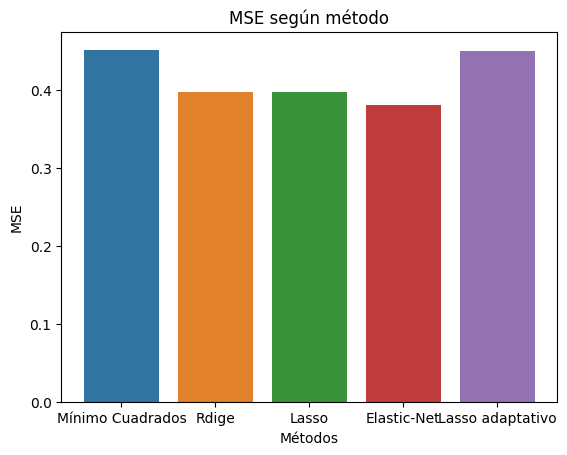

In [17]:
# Para los MSE

datos = {'datos': [0.452, 0.398, 0.398, 0.381, 0.45],
         'metodos': ["Mínimo Cuadrados", "Rdige", "Lasso", "Elastic-Net", "Lasso adaptativo"]}

df = pd.DataFrame(datos)

sns.barplot(x='metodos', y='datos', data=df)

plt.xlabel('Métodos')
plt.ylabel('MSE')
plt.title('MSE según método')
plt.axis('tight') # tanto al eje x como y se ajusten a lo que esta pidiendo

# Mostrar el gráfico
plt.show()
